In [2]:
import sys
print(sys.prefix)
print(sys.executable)

/opt/anaconda3
/opt/anaconda3/bin/python


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Layer,Flatten,Dense

### load the dataset

In [4]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [9]:
#drop unneccesary columns

df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [10]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [13]:
#target variable classes
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

#### There is class imbalance data issue is there

In [14]:
df.groupby(['Geography'])['Exited'].value_counts(normalize=True).to_frame()*100

proportion
Geography Exited            
France    0        83.845233
          1        16.154767
Germany   0        67.556796
          1        32.443204
Spain     0        83.326605
          1        16.673395

In [15]:
df.groupby(['Gender'])['Exited'].value_counts(normalize=True).to_frame()*100

proportion
Gender Exited            
Female 0        74.928461
       1        25.071539
Male   0        83.544072
       1        16.455928

In [16]:
#handling categorical columns

df = pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)

In [17]:
#splitting the data
from sklearn.model_selection import train_test_split


X = df.drop(columns=['Exited'])
y = df['Exited'].values


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [18]:
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

In [19]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()

X_train_scaled = st.fit_transform(X_train)
X_test_scaled = st.transform(X_test)

In [20]:
X_train_scaled

array([[ 1.5178518 , -0.85641715, -1.03980536, ..., -0.57715782,
        -0.57850497,  0.90134069],
       [ 1.0209782 , -0.28681727, -0.3490769 , ..., -0.57715782,
         1.72859362,  0.90134069],
       [ 2.02507693, -0.09695065, -1.03980536, ..., -0.57715782,
         1.72859362, -1.1094584 ],
       ...,
       [ 0.48269847, -1.14121709, -1.03980536, ...,  1.73262835,
        -0.57850497, -1.1094584 ],
       [ 0.66902607,  0.56758255, -1.73053383, ..., -0.57715782,
         1.72859362,  0.90134069],
       [-0.27296346, -0.57161721,  1.03238003, ...,  1.73262835,
        -0.57850497,  0.90134069]])

In [21]:
X_test_scaled

array([[ 1.22800887,  0.37771592, -1.03980536, ...,  1.73262835,
        -0.57850497, -1.1094584 ],
       [ 0.44129234, -0.57161721,  1.37774427, ..., -0.57715782,
        -0.57850497,  0.90134069],
       [ 0.34812854,  3.22571532,  1.03238003, ..., -0.57715782,
        -0.57850497, -1.1094584 ],
       ...,
       [-0.47999413, -0.76148384,  1.03238003, ..., -0.57715782,
        -0.57850497,  0.90134069],
       [ 0.3688316 ,  0.09291598,  0.6870158 , ..., -0.57715782,
        -0.57850497, -1.1094584 ],
       [-0.47999413,  0.66251586, -1.03980536, ..., -0.57715782,
         1.72859362,  0.90134069]])

### Model Building

In [22]:
model = Sequential()

#adding Hidden layers to model
model.add(Dense(11, activation='sigmoid', input_dim=11))
model.add(Dense(11, activation='sigmoid'))

#11 no. of neurons/nodes were there
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
history = model.fit(X_train_scaled,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step - accuracy: 0.7910 - loss: 0.5473 - val_accuracy: 0.7994 - val_loss: 0.4982
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.7916 - loss: 0.5069 - val_accuracy: 0.7994 - val_loss: 0.4883
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.7960 - loss: 0.4899 - val_accuracy: 0.7994 - val_loss: 0.4769
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.7926 - loss: 0.4815 - val_accuracy: 0.7994 - val_loss: 0.4632
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.7987 - loss: 0.4587 - val_accuracy: 0.7994 - val_loss: 0.4496
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.7977 - loss: 0.4472 - val_accuracy: 0.7994 - val_loss: 0.4386
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.7986 - loss: 0.4372 - val_accuracy: 0.8044 - val_loss: 0.4307
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.8053 - loss: 0

In [26]:
y_pred = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step


In [27]:
y_pred

array([[0.20524196],
       [0.10919672],
       [0.209211  ],
       ...,
       [0.00529958],
       [0.39501157],
       [0.1675901 ]], dtype=float32)

In [28]:
y_prediction = np.where(y_pred<0.5,0,1)

In [29]:
y_prediction

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prediction)

0.863

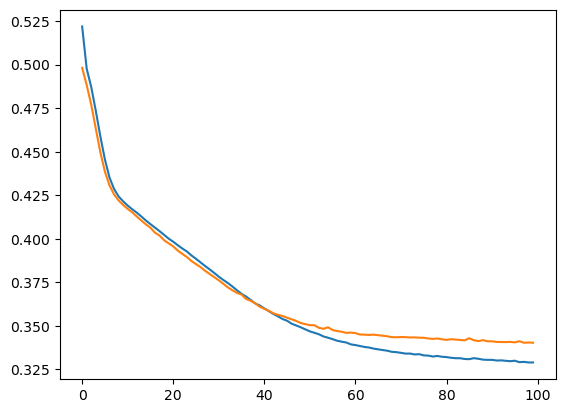

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

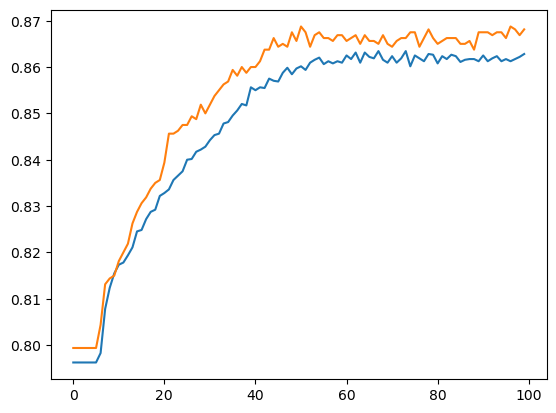

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']);